In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
data = np.loadtxt('data.csv', delimiter = ',')
data.shape

(100, 2)

In [3]:
## lets split the data in two columns

x = data[:, 0]   ## This means give us all the rows and first column.
y = data[:, 1]   ## This means give us all the rows and second column.

In [12]:
x.shape  ## its a 1d array with 100 rows

(100, 1)

In [4]:
## This will create a dataset fro training and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75,)
(25,)
(75,)
(25,)


In [5]:
## Creating algorithm object
alg1 = LinearRegression()
alg1.fit(X_train, Y_train)

## As we see, iit gave error because we gave 1d array, but it requires 2d array. 

ValueError: Expected 2D array, got 1D array instead:
array=[65.41605175 31.588117   56.13038882 38.81681754 52.55001444 54.35163488
 43.31828263 58.16454011 45.41973014 45.61864377 53.66093226 50.07314563
 57.50444762 49.23976534 57.78822399 44.1640495  64.70713867 49.20388754
 46.73761941 35.56783005 41.72067636 56.86890066 43.87061265 57.36205213
 60.26921439 48.14985889 42.43647694 45.44053073 54.28232871 56.72720806
 62.99748075 51.0887199  38.11982403 44.21174175 57.5045333  56.9012147
 55.14218841 52.37844622 61.89622268 48.95588857 50.18638949 51.08863468
 62.49469743 41.37772653 70.34607562 50.28283635 47.47563963 51.84518691
 68.76573427 41.57564262 50.03957594 44.50253806 52.22399609 44.49285588
 50.03017434 61.53035803 34.3331247  52.21179669 35.67809389 38.00548801
 41.18201611 37.67565486 32.50234527 25.12848465 53.57507753 53.42680403
 53.69163957 40.16689901 44.68719623 38.95476907 68.31936082 41.10268519
 32.66904376 46.2309665  66.18981661].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
## It wants data to be 2da array. One option is we can convert the data into 2d array.Reshape your data either using array.
## reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
## After reshaping, we need to split train and test data again and we need to run the training again.

x = data[:, 0].reshape(-1, 1)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)
alg1.fit(X_train, Y_train)


## Linear Regression should have figured out the line y = mx+c. To look at m and c, there is a way.


LinearRegression()

In [7]:
alg1.coef_  ## this is the gradient or m.

array([1.38832346])

In [8]:
alg1.intercept_  ## this is the y intercept.

6.006652170777798

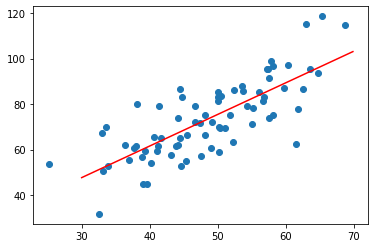

In [9]:
## Lets plot the training data along with this parameters.

## FIrst we plot the line y = mx+c.
## As we saw, m and c is calculated by training data

m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30, 70, 0.1)     ## taken 30 to 70 because data starts from 30 and to get the best fit, data must fall to the line.
y_line = m*x_line + c

plt.plot(x_line, y_line, 'r')
train_1d = X_train.reshape(75)      ## Xtrain is in the form of 2d while ytrain is in 1d,
                                    ##it will be a problem so to avoid the problem, we are converting it into 1d array again.

plt.scatter(X_train, Y_train)       ## Plotting the training data.
plt.show()

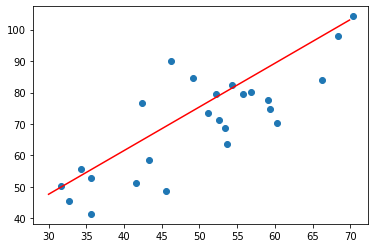

In [10]:
## This time we are plotting the testing data

m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30, 70, 0.1)     ## taken 30 to 70 because data starts from 30 and to get the best fit, data must fall to the line.
y_line = m*x_line + c

plt.plot(x_line, y_line, 'r')
train_1d = X_test.reshape(25)      ## Xtrain is in the form of 2d while ytrain is in 1d,
                                    ##it will be a problem so to avoid the problem, we are converting it into 1d array again.

plt.scatter(X_test, Y_test)       ## Plotting the training data.
plt.show()


## Lets us say that we are predicting for the point which is at the line.
## The points are the actual price while the prediction is on the line. For eg, the point near to 35, the prediction of that
## point will be on the line, while the actual data is on that point.


# 3. Coefficient of Determination(Lecture)

Lets say i have a dataset withh n features, it is almost impossible to plot this features against the output.  
So we need an objective way to find out how the algorithm is performing.  
So we need a way to score our input and whatever output we get, once we passed it through algorithm, the prediction we are getting, we need a way to compare this and objectively come to a score to find out how good and bad our predictions are.  
To find this score we  use Coefficient of Determination.  
It is defined as 1 - u/v where u is  $$\sum_{} (y^T_{i} - y^p_{i})^2$$ 
where y^T is True and y^P  is predicted 
and v is $$\sum_{} (y^T_{i} - y^T_{mean})^2$$   

  
    
where u signifies error in our prediction and v signifies error where predictions is effictively mean.  



To see how good or bad Algo is performing, we were just drawing the line and seeing how far the actual Data points are from the line.  
Thats not really the best way that we can find how good or bad is the Algorithm.  
The problem with this lets say a dataset has n features.  
It is almost impossible to plot these n features against the output.  
So we can look at 2d graphs, we can even look at 3d graphs, but anything more than that it will be impossible.  
We need an objective way of finding out our Algorithm is performing.  
We need a way so we can score our input, so whatever the output 

In [11]:
## To find the coefficient of determination, we have function score in the module.

## finding score in test data.
score_test = alg1.score(X_test, Y_test)

## finding score in training data.
score_training = alg1.score(X_train, Y_train)

score_training, score_test


(0.5989084859950116, 0.558737757421335)